<a href="https://colab.research.google.com/github/delilah8301/task1/blob/main/TSF_GRIP_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-2 Exploratory Data Analysis-Retail**

NAME: Austin Senson

TOPIC: Data Science and Business Analytics


In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#load the dataset
df = pd.read_csv("/content/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Summary of the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#check the data types of the columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Preparing the dataset for analysis

In [ ]:
#check if there is any missing value
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.duplicated().sum()

17

In [ ]:
#drop duplicate values from the dataframe
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#get the count of the unique values of a column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Cleaning Data by filtering irrelevant columns

In [ ]:
# drop the Postal Code column as it is of no use
df = df.drop('Postal Code', axis=1)

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Statistical Relationship between rows and columns

In [ ]:
#get the covariance between the variables
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [ ]:
#get the correlation between variables
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [ ]:
#get the count of unique values from the Region column
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

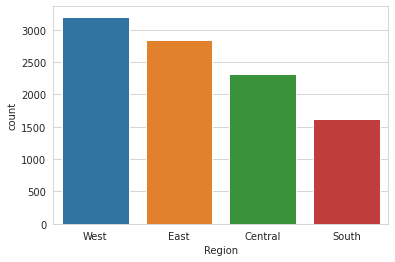

In [ ]:
sns.set_style('whitegrid') 
sns.countplot(df['Region'],order = df['Region'].value_counts().index)

In [ ]:
#get the count of unique values from the State column
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

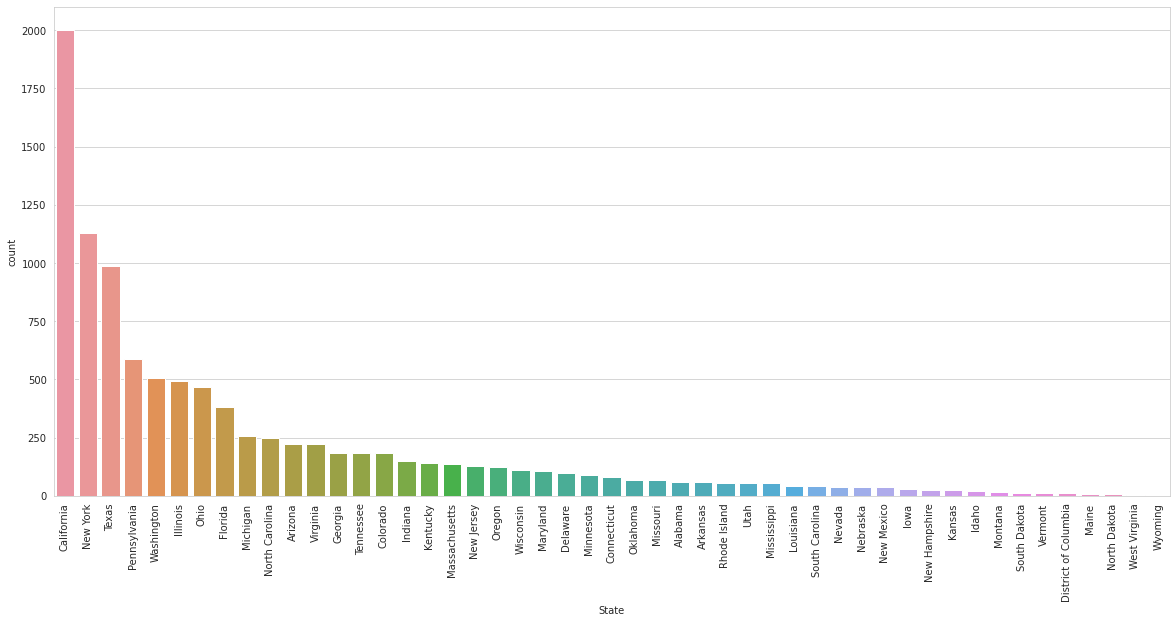

In [ ]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.set_style('whitegrid') 
sns.countplot(df['State'],order = df['State'].value_counts().index)

State wise California has highest sales. Few states like North Dakota, Wyoming and West Virginia have less or no sales at all. To generate more profit we have to increase our sales in Texas and New York where we have potential customers.

**Data Visualization**

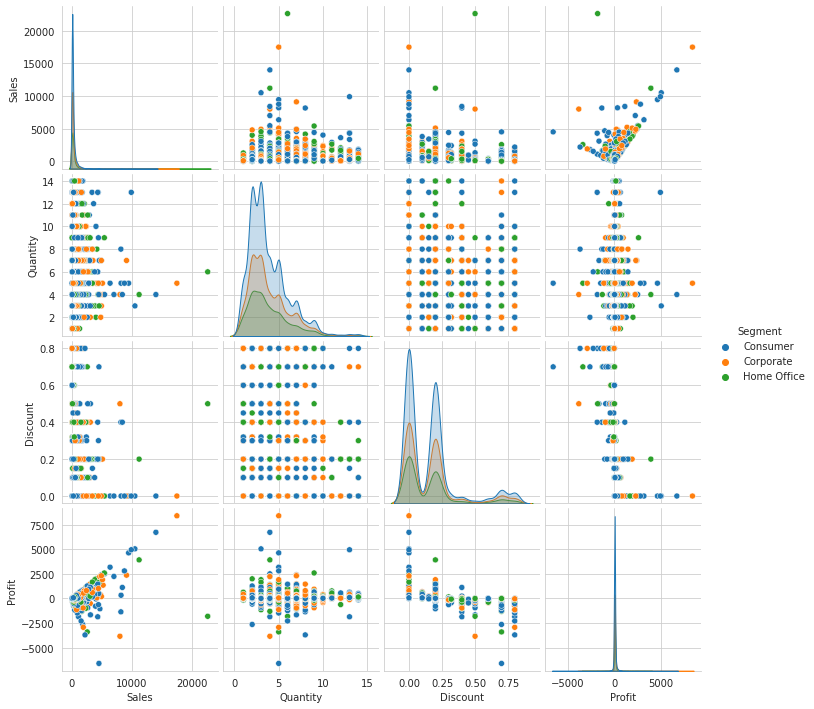

In [ ]:
sns.pairplot(df, hue='Segment')

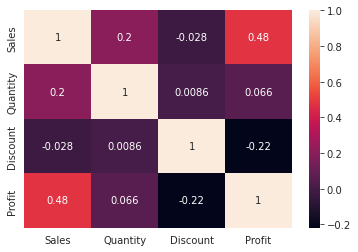

In [ ]:
# heat map showing the correlation between the features
sns.heatmap(df.corr(), annot = True)

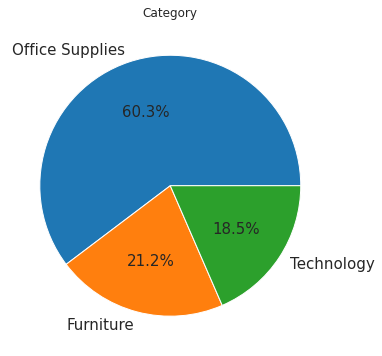

In [ ]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.show()

From the above pi chart its aparent that the office supplies are of the highest demand

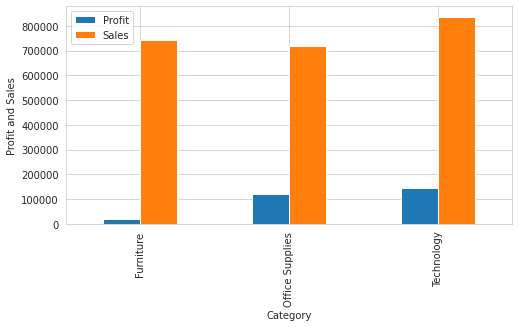

In [ ]:
df.groupby('Category')['Profit','Sales'].agg(sum).plot(kind='bar',figsize=(8,4))
plt.ylabel('Profit and Sales')
plt.show()

Furniture is generating less profit

Text(0.5, 1.0, 'Count of Segment by Category and Segment')

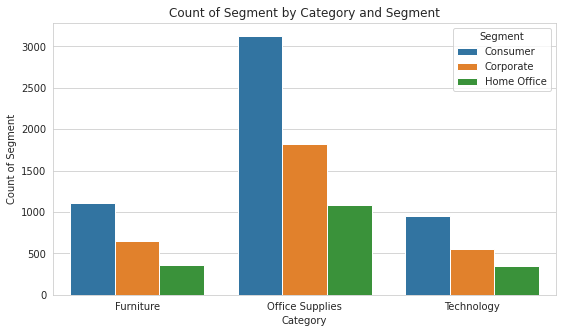

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x='Category',hue='Segment',data=df)
plt.ylabel('Count of Segment')
plt.title('Count of Segment by Category and Segment')

The highest purchases are in consumer segment whereas home office segment has the least purchases in each category. We need to focus on the corporate and home office segment as well to increase our sales and profit.

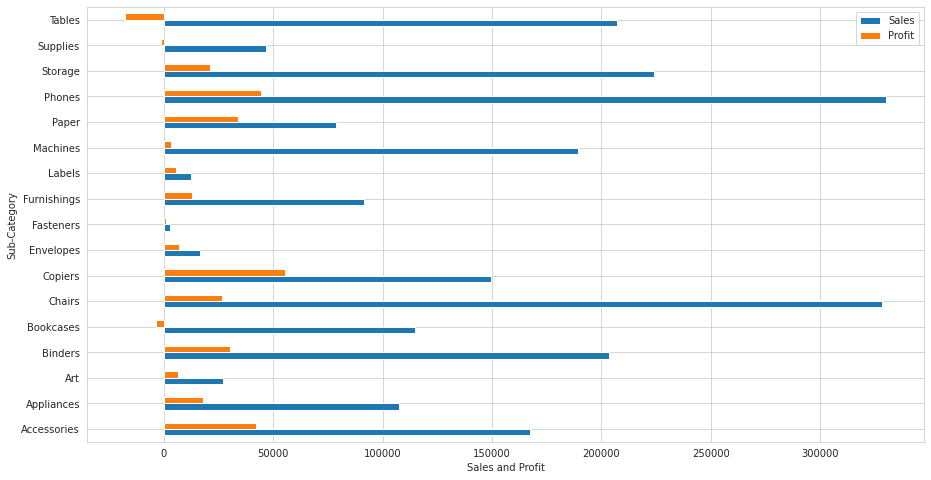

In [ ]:
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='barh',figsize=(15, 8))
plt.ylabel('Sub-Category')
plt.xlabel('Sales and Profit')
plt.show()

We have 3 weak areas Bookcases, Supplies and Tables as we are facing loss on the sales of these items. On the sales of tables we are facing highest loss.

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

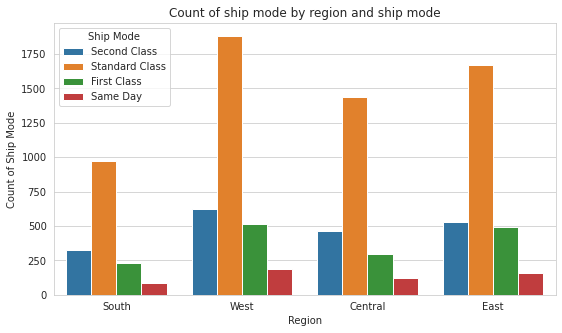

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x='Region',hue='Ship Mode',data=df)
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

Least sales are in Southern region, we can attract this region by offering more discount. Standard mode of shipment is opted by most of the customers in each region.

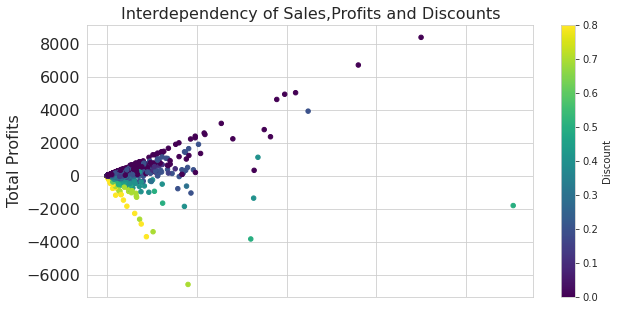

In [ ]:
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

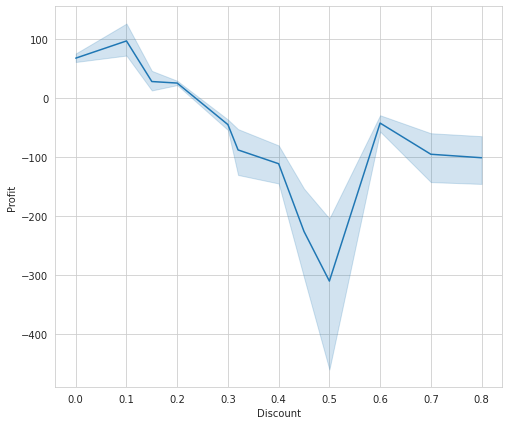

In [ ]:
plt.figure(figsize=(8,7))
sns.lineplot(df['Discount'], df['Profit'], data=df)

To keep the profit margins the percentage of discount should be less than 25%.

Conclusion
The weak areas where one can work to make more profit are:


1. Furniture sales should be limited, but office supplies and technology sales should be increased, as furtinute generates very little profit in comparison to its sales.
2. We are losing a lot of money on tables, supplies, and bookcases in the sub-categories, thus their sales should be minimised.
3. Although we have the most purchases in the consumer category, we should also focus on the corporate and home office categories to grow sales and profits.
4. A few states, such as North Dakota, Wyoming, and West Virginia, have low or no sales, therefore we must pay special attention to them.
5. The percentage of discount offered should not be more than 25% to maintain profit







